In [1]:
import pandas as pd

data = pd.read_csv('legal_text_classification.csv')

print(data.head())
print(data.info())

  case_id case_outcome                                         case_title  \
0   Case1        cited  Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1   Case2        cited  Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...   
2   Case3        cited  Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
3   Case4        cited  Dais Studio Pty Ltd v Bullett Creative Pty Ltd...   
4   Case5        cited  Dr Martens Australia Pty Ltd v Figgins Holding...   

                                           case_text  
0  Ordinarily that discretion will be exercised s...  
1  The general principles governing the exercise ...  
2  Ordinarily that discretion will be exercised s...  
3  The general principles governing the exercise ...  
4  The preceding general principles inform the ex...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id   

Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')
Silhouette Score: 0.10749591303842204


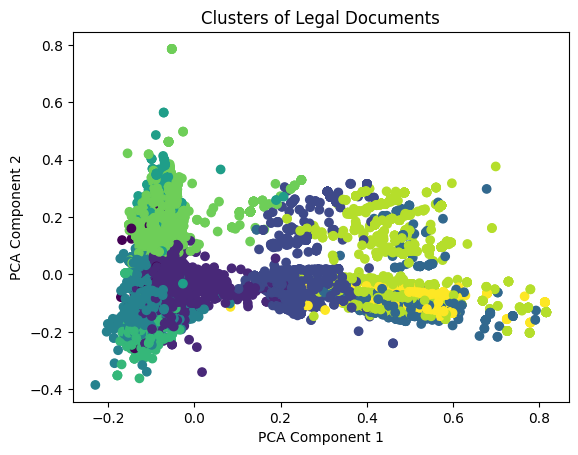

Cluster 0:
- Chase Manhattan Bank Australia Ltd v Oscty Pty Ltd [1995] FCA 1208 ; (1995) 17 ACSR 128...
- Jenkins v National Australia Bank Ltd [1999] FCA 1758...
- Commonwealth Bank of Australia v Begonia Pty Ltd (1993) 11 ACLC 1075...
Cluster 1:
- Seymour v Australian Broadcasting Commission (1977) 19 NSWLR 219...
- Hermes Trade Mark [1982] RPC 425...
- Re Keogh; Ex Parte Keogh v Director of Public Prosecutions (1995) 61 FCR 591...
Cluster 2:
- Park Oh Ho v Minister of State for Immigration and Ethnic Affairs (1988) 81 ALR 288...
- SZMIP v Minister for Immigration and Citizenship [2008] FMCA 1665...
- Guo v Minister for Immigration &amp; Ethnic Affairs (1996) 64 FCR 151...
Cluster 3:
- Minister for Immigration &amp; Multicultural Affairs v SZFDE [2006] FCAFC 142...
- SZEPZ v Minister for Immigration &amp; Multicultural &amp; Indigenous Affairs (2006) 159 FCR 291...
- Applicant S1140/2003 v Minister for Immigration &amp; Multicultural &amp; Indigenous Affairs [2006] FCA 526...
Cluster

In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


data = pd.read_csv('legal_text_classification.csv')


print(data.columns)


def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = re.sub(r'\d', '', text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


data['case_title'] = data['case_title'].astype(str)


data['cleaned_text'] = data['case_title'].apply(preprocess_text)


vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(data['cleaned_text'])


pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X.toarray())


kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_reduced)


silhouette_avg = silhouette_score(X_reduced, clusters)
print(f'Silhouette Score: {silhouette_avg}')


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Legal Documents')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


for cluster_num in range(10):
    print(f'Cluster {cluster_num}:')
    sample_docs = data[clusters == cluster_num].sample(3)
    for doc in sample_docs['case_title']:  # Replace 'case_text' with the actual column name
        print(f'- {doc[:200]}')  # Print the first 200 characters

In [13]:
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_clusters = agg_clustering.fit_predict(X_reduced)


agg_silhouette_avg = silhouette_score(X_reduced, agg_clusters)
print(f'AC Silhouette Score: {agg_silhouette_avg}')

for cluster_num in range(10):
    print(f'Cluster {cluster_num}:')
    sample_docs = data[agg_clusters == cluster_num].sample(3)
    for doc in sample_docs['case_title']:  
        print(f'- {doc[:200]}')  

AC Silhouette Score: 0.1705021562430573
Cluster 0:
- United States v Aronoff 466 FSupp 855 (DC NY 1979)...
- Desktop Marketing Systems Pty Ltd v Telstra Corporation Ltd [2002] FCAFC 112 ; (2002) 119 FCR 491...
- Tran v Commonwealth [2008] FCA 901 , 103 ALD 290...
Cluster 1:
- East v Repatriation Commission (1987) 16 FCR 517...
- ICI Australia Operations Pty Ltd v Trade Practices Commission (1992) 38 FCR 248...
- Apthorpe v Repatriation Commission (1987) 13 ALD 656...
Cluster 2:
- Abebe v Commonwealth [1999] HCA 14 ; (1999) 197 CLR 510 at [192]...
- Commonwealth Banking Corporation v Percival [1988] FCA 240 ; (1988) 20 FCR 176...
- South Australia v Johnson (1982) 42 ALR 161...
Cluster 3:
- SZHBC v Minister for Immigration and Citizenship [2007] FCA 1310...
- SZKNX v Minister for Immigration and Citizenship (2008) 104 ALD 475...
- SZEMB v Minister for Immigration [2005] FMCA 448...
Cluster 4:
- SZBEL v Minister for Immigration &amp; Multicultural &amp; Indigenous Affairs [2006] HCA 63 ;

In [18]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_reduced)


dbscan_silhouette_avg = silhouette_score(X_reduced, dbscan_clusters)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_avg}')


unique_clusters = set(dbscan_clusters)
for cluster_num in unique_clusters:
    if cluster_num == -1:
        continue
    print(f'Cluster {cluster_num}:')
    sample_docs = data[dbscan_clusters == cluster_num].sample(3)
    for doc in sample_docs['case_title']:  
        print(f'- {doc[:200]}')  


DBSCAN Silhouette Score: 0.3004886444433036
Cluster 0:
- Minister for Immigration and Citizenship v Le [2007] FCA 1318 ; (2007) 164 FCR 151...
- Construction, Forestry, Mining and Energy Union v Gordonstone Coal Management Pty Ltd (1997) 78 FCR 437...
- Military Compensation and Rehabilitation Commission v Wall [2004] FCA 1711...
Cluster 1:
- Project Blue Sky v Australian Broadcasting Authority [1998] HCA 28 ; (1989) 194 CLR 355...
- Project Blue Sky v Australian Broadcasting Authority [1998] HCA 28 ; (1998) 194 CLR 355...
- Project Blue Sky Inc v Australian Broadcasting Authority [1998] HCA 29 ; (1998) 194 CLR 355...
Cluster 2:
- Australian Competition and Consumer Commission v The Construction, Forestry, Mining and Energy Union (2007) ATPR 42-140...
- Australian Competition &amp; Consumer Commission v Construction, Forestry, Mining &amp; Energy Union [2008] FCA 678...
- Australian Competition and Consumer Commission v Construction, Forestry, Mining and Energy Union [2008] FCA 678...


In [15]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=10, random_state=42)
gmm_clusters = gmm.fit_predict(X_reduced)

gmm_silhouette_avg = silhouette_score(X_reduced, gmm_clusters)
print(f'GMM Silhouette Score: {gmm_silhouette_avg}')


unique_clusters = set(gmm_clusters)
for cluster_num in unique_clusters:
    print(f'Cluster {cluster_num}:')
    sample_docs = data[gmm_clusters == cluster_num].sample(3)
    for doc in sample_docs['case_title']:  
        print(f'- {doc[:200]}')  


GMM Silhouette Score: -0.009143737183757947
Cluster 0:
- Esber v The Commonwealth [1992] HCA 20 ; (1992) 174 CLR 430...
- Re Investa Properties Ltd [2001] NSWSC 1089 ; (2001) 187 ALR 462...
- Byng v London Life Association Ltd [1990] 1 Ch 170; [1989] 1 All ER 560...
Cluster 1:
- Attorney-General (NSW) v Stuart (1994) 34 NSWLR 667...
- Jango v Northern Territory [2006] FCA 318 ; (2006) 152 FCR 150...
- Ahmad et al v The Government of the United States of America [2006] EWHC 2927 (Admin)...
Cluster 2:
- SZKJV v Minister for Immigration and Citizenship [2008] FCA 831...
- SZFQY v Minister for Immigration and Citizenship [2009] FMCA 395...
- Minister for Immigration and Ethnic Affairs v Guo [1997] HCA 22 ; (1997) 191 CLR 559...
Cluster 3:
- Lombe v Pollak [2004] FCA 264...
- NAZY v Minister for Immigration and Multicultural and Indigenous Affairs [2005] FCA 744 at [39]...
- SZEYH v Minister for Immigration and Multicultural and Indigenous Affairs [2006] FCA 93...
Cluster 4:
- Garry Rogers 